In [2]:
import numpy as np
import pandas as pd
from tueplots.constants.color import rgb
from tueplots import bundles
import matplotlib.pyplot as plt


In [3]:
DATA_PATH = '../data/final'
OUTPUT_PATH = 'output'
cvd_data_path = f'{DATA_PATH}/gbd_cardiovascular_ageRanges_final.csv'

In [4]:
# Grouping into 10 year age groups
def group_ages(df, age_groups, new_age_group):
    filtered_rows = df[df['age_name'].isin(age_groups)]

    summed_rows = filtered_rows.groupby(['location_name', 'year']).sum().reset_index()
    summed_rows['age_name'] = new_age_group
    
    df = pd.concat([df, summed_rows], ignore_index=True)
    df = df[~df['age_name'].isin(age_groups)]
    
    return df

In [5]:
df = pd.read_csv(cvd_data_path)
df = df[(df['metric_name'] == 'Rate') & (df['measure_name'] == 'Incidence') & (df['age_name'] != 'All ages')]

df = group_ages(df, ['20-24 years', '25-29 years'], '20-29')
df = group_ages(df, ['30-34 years', '35-39 years'], '30-39')
df = group_ages(df, ['40-44 years', '45-49 years'], '40-49')
df = group_ages(df, ['50-54 years', '55-59 years'], '50-59')
df = group_ages(df, ['60-64 years', '65-69 years'], '60-69')
df = group_ages(df, ['70-74 years', '75-79 years'], '70-79')
df = group_ages(df, ['80-84', '85-89'], '80-89')
df = group_ages(df, ['90-94', '95+ years'], '90+')
df['age_name'] = df['age_name'].str.replace(' years', '')

df.drop(columns=['measure_name', 'metric_name'], inplace=True)
df = df.groupby(['location_name', 'age_name']).mean().reset_index()
df.drop(columns=['year'], inplace=True)

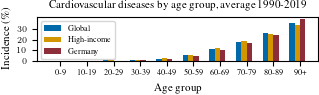

In [17]:
plt.rcParams.update(bundles.icml2022(column="half", ncols=2, nrows=1))

age_groups = sorted(df['age_name'].unique())

color_scheme = {'Global': rgb.tue_blue, 'High-income': rgb.tue_orange, 'Germany': rgb.tue_red}

bar_width = 0.2

for i, (country, color) in enumerate(color_scheme.items()):
    country_df = df[df['location_name'] == country]
    
    total_incidence = country_df['val'].sum()  # Calculate the total incidence rate for the country
    
    x = np.arange(len(age_groups))
    plt.bar(x + i * bar_width, country_df['val'] / total_incidence * 100, width=bar_width, color=color, label=country)  # Calculate the percentage
    
plt.xticks(np.arange(len(age_groups)) + (len(color_scheme) * bar_width) / 2, age_groups)

plt.xlabel('Age group')
plt.ylabel('Incidence (\%)')

plt.yticks([0, 10, 20, 30])  # Set the yticks to 0, 10, 20, 30

plt.title('Cardiovascular diseases by age group, average 1990-2019')
plt.legend()
# plt.legend(ncol=3, loc='lower left', bbox_to_anchor=(0.2, -0.9))
plt.show()
